# Questão 01

![alt text](<Questão 1.png>)


== Posição final x(10s) para cada método ==
Euler explícito (simples):    x = 360.565775121719 m
Euler com append:             x = 360.565775121719 m
Euler pré-alocado:            x = 360.565775121719 m
Runge-Kutta 4ª ordem:         x = 360.521852348012 m

Tempos de execução (segundos) para cada método:
+---------+-------------------+--------------------+---------------------+-----------------+
|       N |   Euler explícito |   Euler com append |   Euler pré-alocado |   Runge-Kutta 4 |
+=========+===================+====================+=====================+=================+
|    1000 |         7.77e-05  |          0.0001059 |           0.0001057 |       0.0006187 |
+---------+-------------------+--------------------+---------------------+-----------------+
|   10000 |         0.0009787 |          0.0009812 |           0.0009528 |       0.0061366 |
+---------+-------------------+--------------------+---------------------+-----------------+
|  100000 |         0.0076319 |          0.

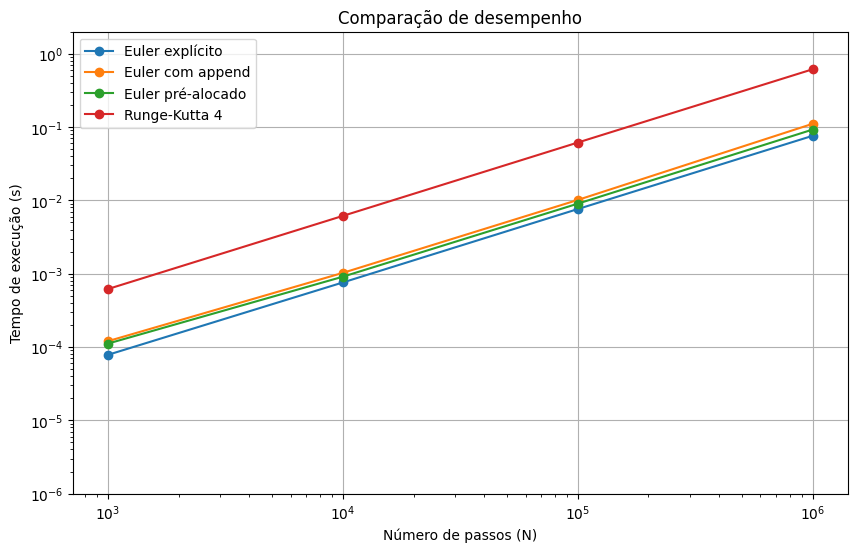

In [1]:
import numpy as np
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

# Constantes
g = 9.8
k = 0.1
v0 = 0.0
x0 = 0.0
t_final = 10

# Métodos numéricos
def euler_explicito(dt, t_final):
    N = int(t_final / dt)
    v, x = v0, x0
    for _ in range(N):
        v += (g - k * v) * dt
        x += v * dt
    return x

def euler_append(dt, t_final):
    N = int(t_final / dt)
    v, x = v0, x0
    x_list = [x]
    for _ in range(N):
        v += (g - k * v) * dt
        x += v * dt
        x_list.append(x)
    return x_list[-1]

def euler_pre_alocado(dt, t_final):
    N = int(t_final / dt)
    v = np.zeros(N + 1)
    x = np.zeros(N + 1)
    v[0], x[0] = v0, x0

    vi, xi = v0, x0
    for i in range(N):
        a = g - k * vi
        vi += a * dt
        xi += vi * dt
    return xi

def runge_kutta(dt, t_final):
    N = int(t_final / dt)
    v, x = v0, x0
    for _ in range(N):
        k1v = (g - k * v) * dt
        k1x = v * dt

        k2v = (g - k * (v + k1v / 2)) * dt
        k2x = (v + k1v / 2) * dt

        k3v = (g - k * (v + k2v / 2)) * dt
        k3x = (v + k2v / 2) * dt

        k4v = (g - k * (v + k3v)) * dt
        k4x = (v + k3v) * dt

        v += (k1v + 2 * k2v + 2 * k3v + k4v) / 6
        x += (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    return x

# Funções de comparação
def comparar_resultados():
    dt = 0.001
    x1 = euler_explicito(dt, t_final)
    x2 = euler_append(dt, t_final)
    x3 = euler_pre_alocado(dt, t_final)
    x4 = runge_kutta(dt, t_final)

    print("\n== Posição final x(10s) para cada método ==")
    print(f"Euler explícito (simples):    x = {x1:.12f} m")
    print(f"Euler com append:             x = {x2:.12f} m")
    print(f"Euler pré-alocado:            x = {x3:.12f} m")
    print(f"Runge-Kutta 4ª ordem:         x = {x4:.12f} m")

def comparar_metodos():
    N_values = [10**3, 10**4, 10**5, 10**6]
    methods = [
        ("Euler explícito", euler_explicito),
        ("Euler com append", euler_append),
        ("Euler pré-alocado", euler_pre_alocado),
        ("Runge-Kutta 4", runge_kutta)
    ]

    table_data = []
    headers = ["N"] + [name for name, _ in methods]

    for N in N_values:
        dt = t_final / N
        row = [N]
        for _, method in methods:
            t0 = time.perf_counter()
            method(dt, t_final)
            elapsed = time.perf_counter() - t0
            row.append(f"{elapsed:.6e}")
        table_data.append(row)

    print("\nTempos de execução (segundos) para cada método:")
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Plot
    plt.figure(figsize=(10, 6))
    for name, method in methods:
        times = []
        for N in N_values:
            dt = t_final / N
            t0 = time.perf_counter()
            method(dt, t_final)
            times.append(time.perf_counter() - t0)
        plt.plot(N_values, times, 'o-', label=name)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-6, 2)  # Garante que todos os tempos apareçam
    plt.xlabel("Número de passos (N)")
    plt.ylabel("Tempo de execução (s)")
    plt.title("Comparação de desempenho")
    plt.legend()
    plt.grid(True)
    plt.show()

# Executar
comparar_resultados()
comparar_metodos()


# Questão 02

![alt text](<Questão 2.png>)

In [4]:
import numpy as np

np.set_printoptions(precision=15, suppress=True)

def cramer(a, b, c, d, e, f):
    det = a * d - b * c
    if abs(det) < 1e-14:
        raise ValueError("Sistema indeterminado ou impossível")
    x = (e * d - b * f) / det
    y = (a * f - e * c) / det
    return x, y

# Parte (a): Cramer
print("\n=== Parte (a): Solução usando Cramer ===")
x_cramer, y_cramer = cramer(a, b, c, d, e, f)
print(f"x = {x_cramer:.15f}")
print(f"y = {y_cramer:.15f}")

# Parte (b): numpy.linalg.solve
print("\n=== Parte (b): Solução com numpy.linalg.solve ===")
A = np.array([[a, b], [c, d]])
B = np.array([e, f])
x_numpy = np.linalg.solve(A, B)
print(f"x = {x_numpy[0]:.15f}")
print(f"y = {x_numpy[1]:.15f}")

# Comparação
print("\nDiferença entre os métodos:")
print(f"Δx = {abs(x_cramer - x_numpy[0]):.3e}")
print(f"Δy = {abs(y_cramer - x_numpy[1]):.3e}")

# Parte (c): Variações no coeficiente
print("\n=== Parte (c): Variação do coeficiente 'd' ===")
d_values = [1.0001, 1.00001, 1.000001, 1.0000001]
for d_var in d_values:
    try:
        x_var, y_var = cramer(a, b, c, d_var, e, f)
        print(f"\nd = {d_var:.8f}")
        print(f"Cramer → x = {x_var:.15f}, y = {y_var:.15f}")
        
        A_var = np.array([[a, b], [c, d_var]])
        x_np_var = np.linalg.solve(A_var, B)
        print(f"numpy  → x = {x_np_var[0]:.15f}, y = {x_np_var[1]:.15f}")
        
        print(f"Diferença: Δx = {abs(x_var - x_np_var[0]):.3e}, Δy = {abs(y_var - x_np_var[1]):.3e}")
    except ValueError as err:
        print(f"\nd = {d_var:.8f} → ERRO: {err}")

# Parte (d): Número de condição
print("\n=== Parte (d): Número de condição ===")
for d_val in [1.0001, 1.00001, 1.000001]:
    A_cond = np.array([[a, b], [c, d_val]])
    cond = np.linalg.cond(A_cond)
    print(f"Para d = {d_val:.7f}, número de condição = {cond:.3e}")


=== Parte (a): Solução usando Cramer ===
x = 0.999999999997780
y = 1.000000000002220

=== Parte (b): Solução com numpy.linalg.solve ===
x = 0.999999999997780
y = 1.000000000002220

Diferença entre os métodos:
Δx = 0.000e+00
Δy = 0.000e+00

=== Parte (c): Variação do coeficiente 'd' ===

d = 1.00010000
Cramer → x = 0.999999999997780, y = 1.000000000002220
numpy  → x = 0.999999999997780, y = 1.000000000002220
Diferença: Δx = 0.000e+00, Δy = 0.000e+00

d = 1.00001000
Cramer → x = -7.999999999955591, y = 9.999999999955591
numpy  → x = -7.999999999955591, y = 9.999999999955591
Diferença: Δx = 0.000e+00, Δy = 0.000e+00

d = 1.00000100
Cramer → x = -98.000000008437695, y = 100.000000008437695
numpy  → x = -98.000000008437695, y = 100.000000008437695
Diferença: Δx = 0.000e+00, Δy = 0.000e+00

d = 1.00000010
Cramer → x = -997.999999418243192, y = 999.999999418243192
numpy  → x = -997.999999418243192, y = 999.999999418243192
Diferença: Δx = 0.000e+00, Δy = 0.000e+00

=== Parte (d): Número de co

# Questão 03

![alt text](<Questão 3.png>)

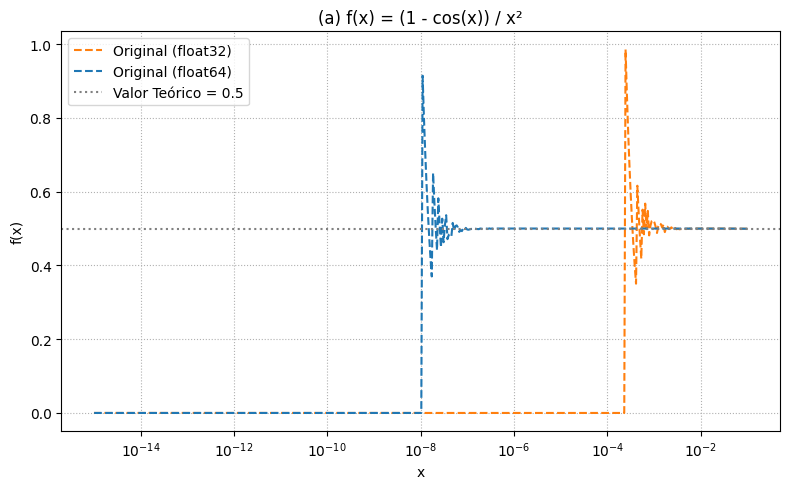

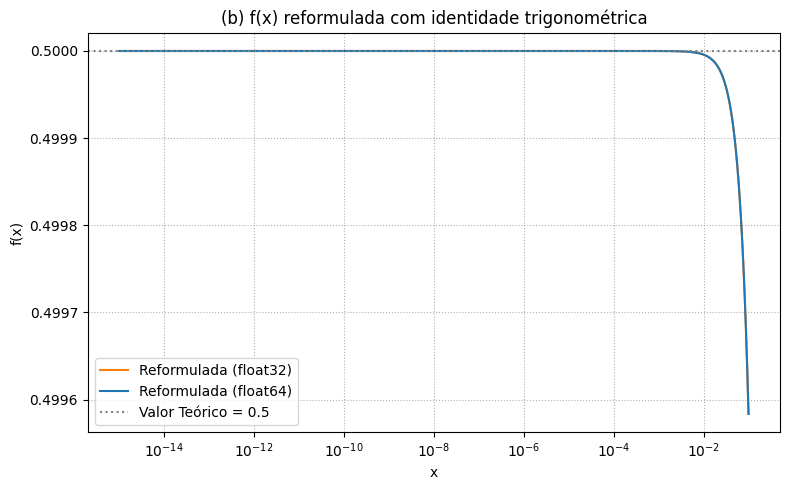

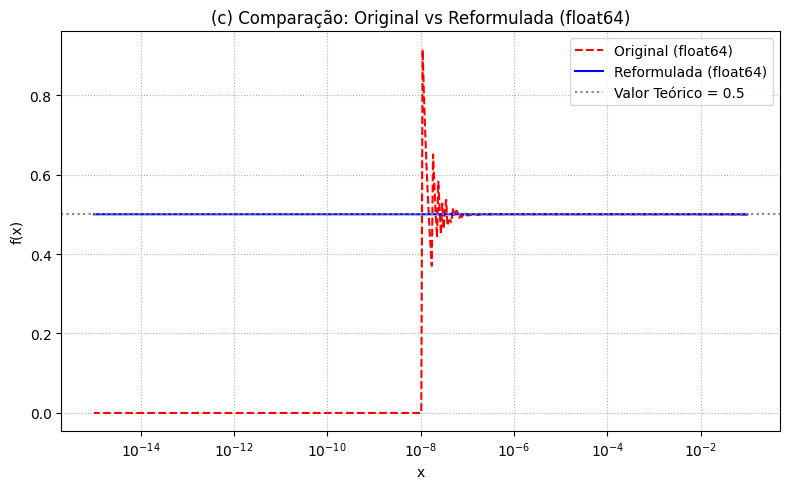

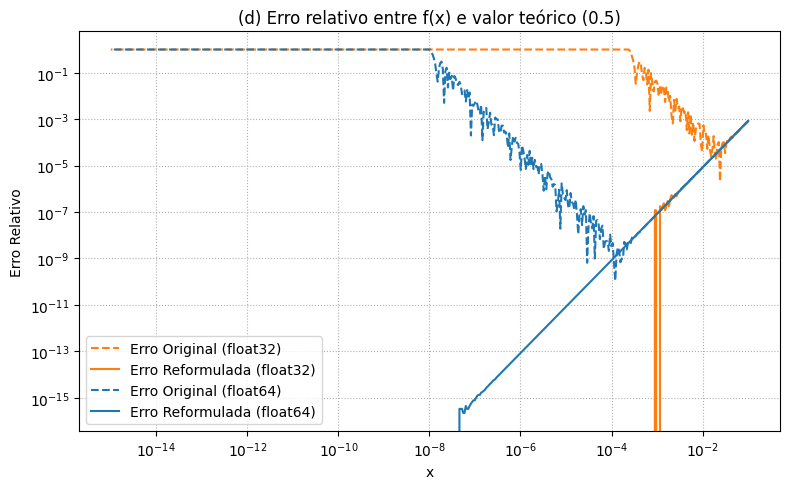

Exemplos de valores numéricos:

--- Tipo: float32 ---
x = 1.0e-01 | f_orig = 4.995823e-01 | f_ref = 4.995834e-01
x = 1.6e-04 | f_orig = 0.000000e+00 | f_ref = 5.000000e-01
x = 2.4e-07 | f_orig = 0.000000e+00 | f_ref = 5.000000e-01
x = 3.8e-10 | f_orig = 0.000000e+00 | f_ref = 5.000000e-01
x = 1.0e-15 | f_orig = 0.000000e+00 | f_ref = 5.000000e-01

--- Tipo: float64 ---
x = 1.0e-01 | f_orig = 4.995835e-01 | f_ref = 4.995835e-01
x = 1.6e-04 | f_orig = 5.000000e-01 | f_ref = 5.000000e-01
x = 2.4e-07 | f_orig = 5.002866e-01 | f_ref = 5.000000e-01
x = 3.8e-10 | f_orig = 0.000000e+00 | f_ref = 5.000000e-01
x = 1.0e-15 | f_orig = 0.000000e+00 | f_ref = 5.000000e-01

Exemplo de cancelamento catastrófico:
'a' e 'b'= 1.0000001 e 1.0
(a - b) = 1.0000000005838672e-07


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ======================
# DEFINIÇÕES DAS FUNÇÕES
# ======================
def f_original(x):
    return (1 - np.cos(x)) / x**2

def f_reformulada(x):
    return 2 * (np.sin(x / 2) ** 2) / x**2

# ======================
# DEFINIÇÃO DO INTERVALO
# ======================
x_vals = np.logspace(-1, -15, num=500)
valor_teorico = 0.5
cores = {np.float32: 'tab:orange', np.float64: 'tab:blue'}
resultados = {}

# ======================
# CÁLCULOS COM float32 E float64
# ======================
for tipo in [np.float32, np.float64]:
    x = x_vals.astype(tipo)
    f_orig = f_original(x).astype(tipo)
    f_ref = f_reformulada(x).astype(tipo)

    erro_orig = np.abs(f_orig - valor_teorico) / valor_teorico
    erro_ref = np.abs(f_ref - valor_teorico) / valor_teorico

    resultados[tipo] = {
        'x': x,
        'f_orig': f_orig,
        'f_ref': f_ref,
        'erro_orig': erro_orig,
        'erro_ref': erro_ref
    }

# ======================
# GRÁFICO (a) - f_original
# ======================
plt.figure(figsize=(8, 5))
for tipo in [np.float32, np.float64]:
    plt.plot(resultados[tipo]['x'], resultados[tipo]['f_orig'], 
             linestyle='--', label=f'Original ({tipo.__name__})', color=cores[tipo])
plt.axhline(0.5, linestyle=':', color='gray', label='Valor Teórico = 0.5')
plt.xscale('log')
plt.title('(a) f(x) = (1 - cos(x)) / x²')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# ======================
# GRÁFICO (b) - f_reformulada
# ======================
plt.figure(figsize=(8, 5))
for tipo in [np.float32, np.float64]:
    plt.plot(resultados[tipo]['x'], resultados[tipo]['f_ref'], 
             linestyle='-', label=f'Reformulada ({tipo.__name__})', color=cores[tipo])
plt.axhline(0.5, linestyle=':', color='gray', label='Valor Teórico = 0.5')
plt.xscale('log')
plt.title('(b) f(x) reformulada com identidade trigonométrica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# ======================
# GRÁFICO (c) - Comparação entre original e reformulada (float64)
# ======================
plt.figure(figsize=(8, 5))
plt.plot(resultados[np.float64]['x'], resultados[np.float64]['f_orig'], 
         'r--', label='Original (float64)')
plt.plot(resultados[np.float64]['x'], resultados[np.float64]['f_ref'], 
         'b-', label='Reformulada (float64)')
plt.axhline(0.5, linestyle=':', color='gray', label='Valor Teórico = 0.5')
plt.xscale('log')
plt.title('(c) Comparação: Original vs Reformulada (float64)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# ======================
# GRÁFICO (d) - Erro relativo
# ======================
plt.figure(figsize=(8, 5))
for tipo in [np.float32, np.float64]:
    plt.plot(resultados[tipo]['x'], resultados[tipo]['erro_orig'], 
             '--', label=f'Erro Original ({tipo.__name__})', color=cores[tipo])
    plt.plot(resultados[tipo]['x'], resultados[tipo]['erro_ref'], 
             '-', label=f'Erro Reformulada ({tipo.__name__})', color=cores[tipo])
plt.xscale('log')
plt.yscale('log')
plt.title('(d) Erro relativo entre f(x) e valor teórico (0.5)')
plt.xlabel('x')
plt.ylabel('Erro Relativo')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# ======================
# TABELA DE VALORES EXEMPLARES
# ======================
print("Exemplos de valores numéricos:")
for tipo in [np.float32, np.float64]:
    x = resultados[tipo]['x']
    f1 = resultados[tipo]['f_orig']
    f2 = resultados[tipo]['f_ref']
    print(f"\n--- Tipo: {tipo.__name__} ---")
    for i in [0, 100, 200, 300, 499]:
        print(f"x = {x[i]:.1e} | f_orig = {f1[i]:.6e} | f_ref = {f2[i]:.6e}")

# ======================
# COMENTÁRIO SOBRE CANCELAMENTO
# ======================
a = np.float64(1.0000001)
b = np.float64(1.0000000)


print("\nExemplo de cancelamento catastrófico:")
print("'a' e 'b'=", a, "e", b )
print("(a - b) =", a - b)

# Explicação:
# Quando x → 0, cos(x) → 1, então 1 - cos(x) envolve subtrair dois valores muito próximos.
# Isso causa perda de dígitos significativos (cancelamento catastrófico), levando a erros.
# A reformulação com sin²(x/2) evita esse problema, pois não há subtração entre valores muito próximos.
